In [4]:
import pandas as pd
from preprocess_data import engineer_features

# Load the CSV
df = pd.read_csv(r'C:\Users\khint\OneDrive - belgiumcampus.ac.za\Documents\LaLiga Prediction\data\LaLiga_Matches.csv')

# Generate the engineered dataset
features_df = engineer_features(df)



In [5]:
import sys
import os

# Add the absolute path to the src folder (one level up from the notebook)
sys.path.append(os.path.abspath('../src'))

# Now import the function from the .py file
from preprocess_data import engineer_features



In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Select features and target
target_col = 'Winner'
feature_cols = ['Points', 'GoalsScored', 'GoalsConceded', 'GoalDifference', 'WinRate', 'AvgGoals']

X = features_df[feature_cols]
y = features_df[target_col]

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Train a simple model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. Evaluate the model
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       111
           1       0.43      0.50      0.46         6

    accuracy                           0.94       117
   macro avg       0.70      0.73      0.71       117
weighted avg       0.94      0.94      0.94       117


Confusion Matrix:
[[107   4]
 [  3   3]]


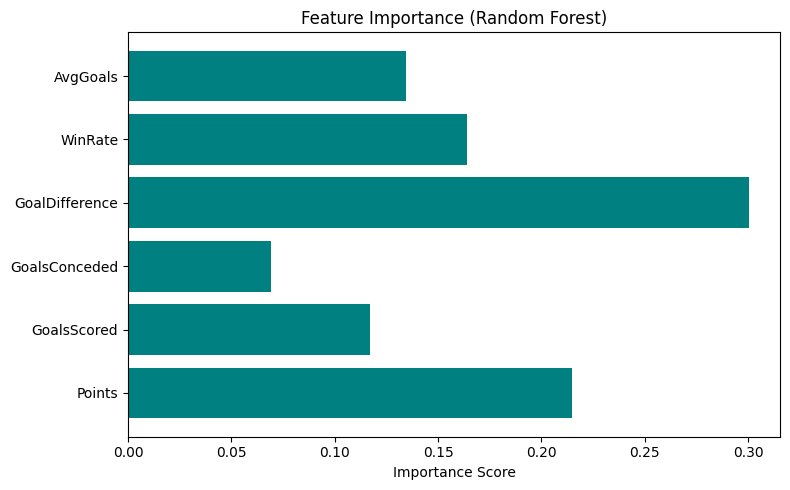

In [7]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
plt.figure(figsize=(8, 5))
plt.barh(feature_cols, importances, color='teal')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()
